In [1]:
import random

import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.utils import shuffle

from evopipe import steps, evopipe

from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'datasets/magic.csv'

data = pd.read_csv(filename, sep=',')
data = shuffle(data)

features = data[data.columns[:-1]]
target = data[data.columns[-1]]
le = preprocessing.LabelEncoder()

tt_features = features[:4000]
tt_target = target[:4000]

val_features = features[4000:]
val_target = features[4000:]

ix = target.index
target = pd.Series(le.fit_transform(target), index=ix)

train_X, test_X, train_Y, test_Y = train_test_split(tt_features, tt_target, test_size = 0.25, random_state = 0)

params = steps.get_params(len(train_X.iloc[0]))

In [3]:
# score is accuracy for magic
clf = evopipe.EvoPipeClassifier(steps.preproc, steps.clfs, params, ['featsel', 'scaling'], pop_size=300, ngen=30, mutpb=0.5, swap_mutpb=0.2,
                                param_mutpb=0.85, ind_mutpb=0.8, len_mutpb=0.5)
clf.fit(train_X, train_Y, test_X, test_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe, score in best_pipes:
    pipe.fit(train_X, train_Y)
    # res_Y = pipe.predict(test_X)
    
    # score = metrics.cohen_kappa_score(test_Y, res_Y, weights='quadratic')
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))

evaluating: [('FA', OrderedDict([('n_components', 7)]), 'featsel'), ('MinMaxScaler', OrderedDict(), 'scaling'), ('KNeighbors', OrderedDict([('algorithm', 'ball_tree'), ('n_neighbors', 2)]))]Evolution starting...
evaluating: [('FA', OrderedDict([('n_components', 7)]), 'featsel'), ('MinMaxScaler', OrderedDict(), 'scaling'), ('KNeighbors', OrderedDict([('algorithm', 'ball_tree'), ('n_neighbors', 2)]))]
Gen 2:

evaluating: [('LDA', OrderedDict([('shrinkage', 'auto'), ('solver', 'lsqr')]))]
Gen 3:

evaluating: [('PCA', OrderedDict([('n_components', 7), ('whiten', True)]), 'featsel'), ('MinMaxScaler', OrderedDict(), 'scaling'), ('LDA', OrderedDict([('shrinkage', None), ('solver', 'lsqr')]))]
Gen 4:

evaluating: [('FA', OrderedDict([('n_components', 5)]), 'featsel'), ('StandardScaler', OrderedDict(), 'scaling'), ('SVC', OrderedDict([('C', 10), ('gamma', 'auto'), ('tol', 0.0001)]))]
Gen 5:

evaluating: [('FA', OrderedDict([('n_components', 1)]), 'featsel'), ('MinMaxScaler', OrderedDict(), 'sca

   	                        fitness                         	                  train_test                 
   	--------------------------------------------------------	---------------------------------------------
gen	var        	avg     	min     	max     	var        	avg     	min  	max  
0  	0.00414889 	0.715374	0.497333	0.846667	0.00780196 	0.7152  	0.347	0.851
1  	0.000877138	0.770213	0.66    	0.851333	0.00236815 	0.770372	0.352	0.86 
2  	0.00102331 	0.783866	0.66    	0.851333	0.00151764 	0.787793	0.649	0.86 
3  	0.000555022	0.777567	0.663333	0.854   	0.000739323	0.782513	0.649	0.87 
4  	0.00198109 	0.777397	0.66    	0.854   	0.00263372 	0.779243	0.563	0.87 
5  	0.00274932 	0.750538	0.617333	0.854   	0.00469166 	0.750987	0.504	0.87 
6  	0.000919212	0.766322	0.66    	0.854   	0.00230296 	0.76958 	0.423	0.876
7  	0.000739211	0.782902	0.601   	0.854   	0.000815574	0.79117 	0.666	0.87 
8  	0.000222706	0.785789	0.755333	0.854   	0.000351315	0.785037	0.758	0.87 
9  	0.000339451	0.794027	0

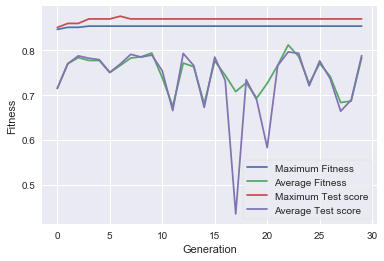

In [4]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.chapters["fitness"].select("avg", "min", "max", "var")
avgs_tt, mins_tt, maxs_tt, vars_tt = clf.logbook.chapters["train_test"].select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
line1 = ax1.plot(gen, maxs, label='Maximum Fitness')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

line2 = ax1.plot(gen, avgs, label='Average Fitness')

line3 = ax1.plot(gen, maxs_tt, label='Maximum Test score')
line4 = ax1.plot(gen, avgs_tt, label='Average Test score')

lines = line1 + line2 + line3 + line4
labels = [l.get_label() for l in lines]
legend = plt.legend(lines, labels, loc='lower right', frameon=True)


plt.show()

In [5]:
print(clf.score(val_features, val_target))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets